In [1]:
import os
import numpy as np
import scipy.optimize as opt
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import display

from bikewheelcalc import BicycleWheel
import bikewheellib as bl

%matplotlib inline

In [2]:
rim_name = ['Alex-ALX295', 'DTS-R460', 'CR18-20', 'CR18-700',
            'X404-27', 'Y2000-26', 'Y2000-700']

rim_label = ['Alex ALX295', 'DTS R460', 'CR18 20"', 'CR18 700c', 'X404 27"', 'Y2000 26"', 'Y2000 700c']

xsc_type = ['deep double-wall', 'deep double-wall', 'shallow double wall', 'shallow double-wall',
            'single-wall', 'single-wall', 'single-wall']

radius = [0.305, 0.304, 0.217, 0.304, 0.307, 0.271, 0.302]
mass = [0.480, 0.459, 0.3797, 0.5377, 0.5936, 0.4590, 0.5508]

GJ_4p = [(96.5, 3.8), (114.8, 5.8), (24.7, 1.5), (25.9, 1.7),
         (15.9, 1.0), (13.4, 0.9), (18.9, 1.2)]

mu_4p = [(0.49, 0.017), (0.54, 0.03), (0.13, 0.02), (0.1, 0.02),
         (0.07, 0.018), (0.09, 0.019), (0.1, 0.019)]

rims = pd.DataFrame({'label': rim_label, 'radius': radius, 'mass': mass,
                     'GJ_4p': GJ_4p, 'mu_4p': mu_4p}, index=rim_name)

rims['f_rad'] = None
rims.at['Alex-ALX295', 'f_rad'] = {2:161.5, 3:454.0, 4:862.3}
rims.at['DTS-R460', 'f_rad'] = {2:155., 3:435.9, 4:837.}
rims.at['CR18-20', 'f_rad'] = {2:174.3, 3:500.3, 4:934.2}
rims.at['CR18-700', 'f_rad'] = {2:92.0, 3:259.7, 4:496.1}
rims.at['X404-27', 'f_rad'] = {2:93.70, 3:264.45, 4:505.36}
rims.at['Y2000-26', 'f_rad'] = {2:119.9, 3:339.1, 4:648.7}
rims.at['Y2000-700', 'f_rad'] = {2:97.2, 3:275.2, 4:526.4}

rims['f_lat'] = None
rims.at['Alex-ALX295', 'f_lat'] = {2:117.4, 3:353.0, 4:665.0, 5:1074.}
rims.at['DTS-R460', 'f_lat'] = {2:127.8, 3:382.5, 4:727.8, 5:1138.}
rims.at['CR18-20', 'f_lat'] = {2:151.2, 3:492.0, 4:989.0, 5:1594.}
rims.at['CR18-700', 'f_lat'] = {2:82.5,  3:273.5, 4:566.0, 5:938.}
rims.at['X404-27', 'f_lat'] = {2:62.6,  3:214.0, 4:445.0, 5:736.}
rims.at['Y2000-26', 'f_lat'] = {2:78.5,  3:269.0, 4:540.0, 5:900.}
rims.at['Y2000-700', 'f_lat'] = {2:69.5,  3:234.5, 4:482.0, 5:636.2}

display(rims)

,GJ_4p,label,mass,mu_4p,radius,f_rad,f_lat
Alex-ALX295,"(96.5, 3.8)",Alex ALX295,0.4800,"(0.49, 0.017)",0.305,"{2: 161.5, 3: 454.0, 4: 862.3}","{2: 117.4, 3: 353.0, 4: 665.0, 5: 1074.0}"
DTS-R460,"(114.8, 5.8)",DTS R460,0.4590,"(0.54, 0.03)",0.304,"{2: 155.0, 3: 435.9, 4: 837.0}","{2: 127.8, 3: 382.5, 4: 727.8, 5: 1138.0}"
CR18-20,"(24.7, 1.5)","CR18 20""",0.3797,"(0.13, 0.02)",0.217,"{2: 174.3, 3: 500.3, 4: 934.2}","{2: 151.2, 3: 492.0, 4: 989.0, 5: 1594.0}"
CR18-700,"(25.9, 1.7)",CR18 700c,0.5377,"(0.1, 0.02)",0.304,"{2: 92.0, 3: 259.7, 4: 496.1}","{2: 82.5, 3: 273.5, 4: 566.0, 5: 938.0}"
X404-27,"(15.9, 1.0)","X404 27""",0.5936,"(0.07, 0.018)",0.307,"{2: 93.7, 3: 264.45, 4: 505.36}","{2: 62.6, 3: 214.0, 4: 445.0, 5: 736.0}"
Y2000-26,"(13.4, 0.9)","Y2000 26""",0.4590,"(0.09, 0.019)",0.271,"{2: 119.9, 3: 339.1, 4: 648.7}","{2: 78.5, 3: 269.0, 4: 540.0, 5: 900.0}"
Y2000-700,"(18.9, 1.2)",Y2000 700c,0.5508,"(0.1, 0.019)",0.302,"{2: 97.2, 3: 275.2, 4: 526.4}","{2: 69.5, 3: 234.5, 4: 482.0, 5: 636.2}"


In [3]:
# Set default fit range

rims['fit_rng_rad'] = None
rims['fit_rng_lat'] = None

df = 44100. / (4*8192)

for r in rims.index:
    idx_2 = int(np.round(rims['f_rad'][r][2] / df))
    rng_2 = np.arange(-3, 3+1)
    
    idx_3 = int(np.round(rims['f_rad'][r][3] / df))
    rng_3 = np.arange(-5, 5+1)
    
    rims.at[r, 'fit_rng_rad'] = {2: idx_2 + rng_2, 3: idx_3 + rng_3}
    
for r in rims.index:
    idx_2 = int(np.round(rims['f_lat'][r][2] / df))
    rng_2 = np.arange(-3, 3+1)
    
    idx_3 = int(np.round(rims['f_lat'][r][3] / df))
    rng_3 = np.arange(-5, 5+1)
    
    idx_4 = int(np.round(rims['f_lat'][r][4] / df))
    rng_4 = np.arange(-5, 5+1)
    
    rims.at[r, 'fit_rng_lat'] = {2: idx_2 + rng_2, 3: idx_3 + rng_3, 4:idx_4 + rng_4}

rims.at['Alex-ALX295', 'fit_rng_rad'] = {2:np.arange(110, 126), 3:np.arange(330, 345)}
rims.at['Alex-ALX295', 'fit_rng_lat'] = {2:np.arange(80, 95), 3:np.arange(258, 270),
                                         4:np.arange(490, 498)}

rims.at['DTS-R460', 'fit_rng_rad'] = {2:np.arange(110, 130), 3:np.arange(325, 335)}
rims.at['DTS-R460', 'fit_rng_lat'] = {2:np.arange(85, 105), 3:np.arange(275, 295),
                                      4:np.arange(536, 546)}

rims.at['CR18-20', 'fit_rng_rad'] = {2:np.arange(120, 135), 3:np.arange(369, 374)}
rims.at['CR18-20', 'fit_rng_lat'] = {2:np.arange(100, 125), 3:np.arange(355, 371),
                                     4:np.arange(725, 741)}

rims.at['CR18-700', 'fit_rng_rad'] = {2:np.arange(65, 75), 3:np.arange(191, 200)}
rims.at['CR18-700', 'fit_rng_lat'] = {2:np.arange(55, 68), 3:np.arange(200, 210),
                                      4:np.arange(410, 435)}

rims.at['X404-27', 'fit_rng_lat'] = {2:rims.at['X404-27', 'fit_rng_lat'][2],
                                     3:rims.at['X404-27', 'fit_rng_lat'][3],
                                     4:np.arange(320, 335)}

rims.at['Y2000-26', 'fit_rng_rad'] = {2:np.arange(80, 100), 3:np.arange(248, 260)}
rims.at['Y2000-26', 'fit_rng_lat'] = {2:np.arange(55, 65), 3:np.arange(190, 210),
                                      4:np.arange(395, 406)}

rims.at['Y2000-700', 'fit_rng_rad'] = {2:np.arange(65, 77), 3:np.arange(200, 215)}
rims.at['Y2000-700', 'fit_rng_lat'] = {2:np.arange(46, 60), 3:np.arange(165, 185),
                                       4:np.arange(350, 363)}

# Fit Lorentzian to each peak for $f$ and $\Delta f$

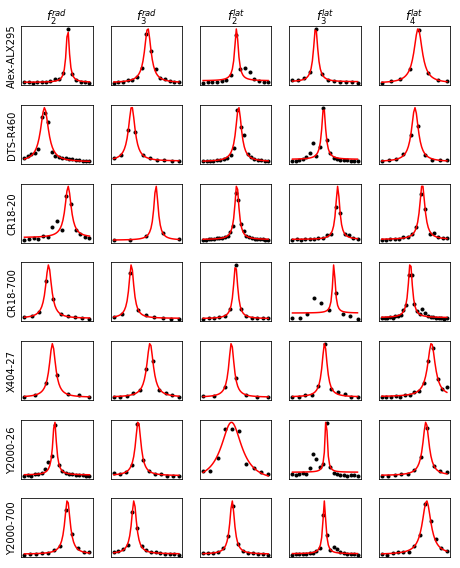

In [4]:
def fft_avg(x, fs, N_avg=32, N_buff=8192):
    'Calculate averaged fft with from multiple spectral averages.'
    X = 0.
    for i in range(N_avg):
        X = X + np.abs(np.fft.rfft(x[range(i*N_buff, (i+1)*N_buff)]))

    f = np.fft.rfftfreq(N_buff, 1./fs)
    return f, X / N_avg

def lorentz(x, A, x0, w, B):
    'Lorentzian peak function'
    
    return A / ((x-x0)**2 + (0.5*w)**2) + B

def gaussian(x, A, x0, c, B):
    'Gasusian peak function'
    
    return A * np.exp(-(x-x0)**2/(2*c**2)) + B

def fit_peaks(f, fft, fit_rng, func=lorentz, ax=None):
    'Fit Lorentzian to the peaks in (f, fft) near f_list.'
    
    def fit_peak(f, fft, idx):
        p0 = (fft[idx[2]], f[idx[2]], 0.01*f[idx[2]], 0)
        bounds_l = [0., f[idx[0]], 0, 0]
        bounds_u = [np.inf, f[idx[-1]], np.inf, np.inf]
        popt, pcov = opt.curve_fit(func, f[idx], fft[idx], p0,
                                   bounds=(bounds_l, bounds_u))
        return popt, pcov
    
    f_fit = []

    for i, n in enumerate(fit_rng.keys()):

        idx = fit_rng[n]
        if ax is not None:
            ax[i].plot(f[idx], fft[idx], 'k.')
        
        try:
            f_guess =  f[idx[np.argmax(fft[idx])]]
            p0 = (np.max(fft[idx]), f_guess, 0.01*f_guess, 0)

            b_l = [0., f[idx[0]], 0., 0]
            b_u = [np.inf, f[idx[-1]], np.inf, np.inf]
            
            popt, pcov = opt.curve_fit(func, f[idx], fft[idx], p0,
                                       bounds=(b_l, b_u))

            f_fit.append((popt[1], np.max([np.sqrt(np.diag(pcov)[1]), f[-1]/len(f)])))
#             f_fit.append((popt[1], np.sqrt(np.diag(pcov)[1])))
            
            if ax is not None:
                ff = np.linspace(f[idx[0]], f[idx[-1]], 50)
                ax[i].plot(ff, func(ff, popt[0], popt[1], popt[2], popt[3]), 'r')
                
        except:
            print '### ERROR ###'
            f_fit.append((0.0, 0.0))
#             raise
            
    return f_fit

rims['f_rad_fit'] = None
rims['f_lat_fit'] = None

fig, ax = plt.subplots(ncols=5, nrows=7, figsize=(6.5, 8.0))

ax[0, 0].set_title(r'$f_2^{rad}$')
ax[0, 1].set_title(r'$f_3^{rad}$')
ax[0, 2].set_title(r'$f_2^{lat}$')
ax[0, 3].set_title(r'$f_3^{lat}$')
ax[0, 4].set_title(r'$f_4^{lat}$')

for i, r in enumerate(rims.index):
    
    p_rad, fs_rad = sf.read('../data/acoustic_test/{0:s}_radial_{1:d}.wav'
                            .format(r, 1))
    p_lat, fs_lat = sf.read('../data/acoustic_test/{0:s}_lateral_{1:d}.wav'
                            .format(r, 1))

    freq_rad, fft_rad = fft_avg(p_rad, fs_rad, N_avg=32/4, N_buff=8192*4)
    freq_lat, fft_lat = fft_avg(p_lat, fs_lat, N_avg=32/4, N_buff=8192*4)

    ax[i, 0].set_ylabel(r)
    f_fit_rad = fit_peaks(freq_rad, fft_rad, rims['fit_rng_rad'][r], ax=ax[i, 0:2])
    f_fit_lat = fit_peaks(freq_lat, fft_lat, rims['fit_rng_lat'][r], ax=ax[i, 2:])
    
    rims.at[r, 'f_rad_fit'] = dict(zip(rims['f_rad'][r].keys(), f_fit_rad))
    rims.at[r, 'f_lat_fit'] = dict(zip(rims['f_lat'][r].keys(), f_fit_lat))
    
    for a in ax.flatten():
        a.set_xticks([])
        a.set_yticks([])
#         a.set_yscale('log')

plt.tight_layout()
# plt.savefig('peak_fits.png', dpi=600)

In [5]:
print 'Lateral'
for r in rims.index:
    print r, rims['f_lat_fit'][r][2], rims['f_lat_fit'][r][3]
    
print 'Radial'

for r in rims.index:
    print r, rims['f_rad_fit'][r][2]

Lateral
Alex-ALX295 (117.33519208093772, 1.3457430576747025) (352.50002298036162, 1.3457430576747025)
DTS-R460 (128.34974451545781, 1.3457430576747025) (382.37307265124866, 1.3457430576747025)
CR18-20 (151.31771401618502, 1.3457430576747025) (491.81632260705874, 1.3457430576747025)
CR18-700 (82.079469113694145, 1.3457430576747025) (276.87820061094772, 1.6487858499359214)
X404-27 (62.727399597393905, 1.3457430576747025) (213.90790523995298, 1.3457430576747025)
Y2000-26 (79.299032083065185, 1.3457430576747025) (268.95268707975515, 1.3457430576747025)
Y2000-700 (69.71929514589543, 1.3457430576747025) (234.59420200331712, 1.3457430576747025)
Radial
Alex-ALX295 (161.47827148615161, 1.3457430576747025)
DTS-R460 (155.91994065910305, 1.3457430576747025)
CR18-20 (174.14939536320671, 1.3457430576747025)
CR18-700 (91.96220470528111, 1.3457430576747025)
X404-27 (93.645633870476772, 1.3457430576747025)
Y2000-26 (119.5052654373, 1.3457430576747025)
Y2000-700 (97.261683479731261, 1.3457430576747025)


# Calculate $GJ$ and $\mu$ from $f_3$ and $f_2$

In [6]:
# Calculate mu and error in mu
f_3 = np.array([rims['f_lat_fit'][r][3][0] for r in rims.index])
df_3 = np.array([rims['f_lat_fit'][r][3][1] for r in rims.index])

f_2 = np.array([rims['f_lat_fit'][r][2][0] for r in rims.index])
df_2 = np.array([rims['f_lat_fit'][r][2][1] for r in rims.index])

f_32 = f_3 / f_2

mu_ac = (16. - f_32**2)/(9.*f_32**2-64.)

# Estimate uncertainty on mu using Monte Carlo method
N = 1000000
mu_err_mc = 0*mu_ac
for i in range(len(mu_ac)):
    ff_3 = np.random.normal(f_3[i], df_3[i], N)
    ff_2 = np.random.normal(f_2[i], df_2[i], N)
    
    ff_32 = ff_3 / ff_2
    
    mmu = (16. - ff_32**2)/(9.*ff_32**2-64.)
    
    mu_err_mc[i] = np.std(mmu)

# Assume 1% error on frequencies
# This is equivalent to s_mu = sqrt((dmu/df3)**2*s_f3**2 + (dmu/df2)**2*s_f2**2)
# sig_r = f_32 * np.sqrt((0.01)**2 + (0.01)**2)
# mu_err = 160.*f_32 / (9.*f_32**2 - 64.)**2 * sig_r

GJ_ac = 2*np.pi*rims['radius']**3*rims['mass']*\
    f_2**2 * (4*mu_ac+1)/36.

u_R = 0.01 * 6*np.pi*rims['radius']**3*rims['mass']*\
    f_2**2 * (4*mu_ac+1)/36.

u_M = 0.01 * 2*np.pi*rims['radius']**3*rims['mass']*\
    f_2**2 * (4*mu_ac+1)/36.

u_f = (df_2/f_2) * 4*np.pi*rims['radius']**3*rims['mass']*\
    f_2**2 * (4*mu_ac+1)/36.

u_mu = mu_err_mc*2*np.pi*rims['radius']**3*rims['mass']*\
    f_2**2 * 4*mu_ac/36.

GJ_err = np.sqrt(u_R**2 + u_M**2 + u_f**2 + u_mu**2)

rims['GJ_ac'] = zip(GJ_ac, GJ_err)
rims['mu_ac'] = zip(mu_ac, mu_err_mc)

rims[['GJ_4p', 'GJ_ac', 'mu_4p', 'mu_ac']]

,GJ_4p,GJ_ac,mu_4p,mu_ac
Alex-ALX295,"(96.5, 3.8)","(85.719330639, 4.66179707858)","(0.49, 0.017)","(0.404853389129, 0.0611985499825)"
DTS-R460,"(114.8, 5.8)","(103.623929233, 5.83079133753)","(0.54, 0.03)","(0.448713675603, 0.0647001436915)"
CR18-20,"(24.7, 1.5)","(26.3544668831, 0.972647203799)","(0.13, 0.02)","(0.174930138062, 0.0164217643648)"
CR18-700,"(25.9, 1.7)","(26.3098558078, 1.21313563094)","(0.1, 0.02)","(0.120297895752, 0.0219451185902)"
X404-27,"(15.9, 1.0)","(16.8670999736, 0.908576108505)","(0.07, 0.018)","(0.107502821331, 0.0258794773985)"
Y2000-26,"(13.4, 0.9)","(14.5885814095, 0.683655662931)","(0.09, 0.019)","(0.113763712368, 0.0212325350589)"
Y2000-700,"(18.9, 1.2)","(19.224976163, 0.973560892311)","(0.1, 0.019)","(0.123428719153, 0.0260499791531)"


# Lateral mode stiffness

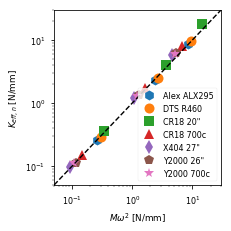

In [7]:
mrk = ['h', 'o', 's', '^', 'd', 'p', '*', '.']
col = ['y', 'k', 'r', 'g', 'b', 'm', 'c', 'k']
ms = ['yh', 'ko', 'rs', 'g^', 'bd', 'pm', 'c*', 'k.']
ms = ['h', 'o', 's', '^', 'd', 'p', '*', '.']

# import seaborn as sns
# sns.set()
# sns.set_style('ticks')

with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(figsize=(3.32, 3.32))

    for i, r in enumerate(rims.index):

        # Plot modes 2, 3, 4
        n = np.arange(2, 5)
        
        # Acoustic (m omega^2)
        wn = np.array([2*np.pi*rims['f_lat_fit'][r][nn][0] for nn in n])
        Kn_a = rims['mass'][r] * wn**2
        e_Kn_a = 0.01 * Kn_a

        # Four-point bend
        Kn_4p = n**2*(n**2-1)**2/(rims['mu_4p'][r][0]*n**2+1) *\
            2*np.pi*rims['GJ_4p'][r][0]/(rims['radius'][r]**3)

        e_Kn_4p_R = 0.01*3*n**2*(n**2-1)**2/(rims['mu_4p'][r][0]*n**2+1) *\
            2*np.pi*rims['GJ_4p'][r][0]/(rims['radius'][r]**3)

        e_Kn_4p_mu = -rims['mu_4p'][r][1]*n**4*(n**2-1)**2/(rims['mu_4p'][r][0]*n**2+1)**2 *\
            2*np.pi*rims['GJ_4p'][r][1]/(rims['radius'][r]**3)

        e_Kn_4p_GJ = n**2*(n**2-1)**2/(rims['mu_4p'][r][0]*n**2+1) *\
            2*np.pi*rims['GJ_4p'][r][1]/(rims['radius'][r]**3)

        e_Kn_4p = np.sqrt(e_Kn_4p_R**2 + e_Kn_4p_GJ**2 + e_Kn_4p_mu**2)

#             plt.errorbar(Kn_a/1e6, Kn_4p/1e6, xerr=e_Kn_a/1e6, yerr=e_Kn_4p/1e6,
#                          fmt=mrk[i], color=col[i],
#                          markerfacecolor='w', markeredgecolor=col[i],
#                          markeredgewidth=2, markersize=8)
        ax.plot(Kn_a/1e6, Kn_4p/1e6, ms[i], markersize=10, label=rims['label'][r])

    plt.plot([0.05, 30.], [0.05, 30.], 'k--')
    plt.axis([0.05, 30., 0.05, 30.])
    plt.gca().set_xscale('log', nonposx='clip')
    plt.gca().set_yscale('log', nonposy='clip')

    plt.xlabel('$M \omega^2$ [N/mm]')
    plt.ylabel('$K_{eff,n}$ [N/mm]')
    
    plt.legend(loc='lower right', numpoints=1)
    plt.tight_layout()

    plt.savefig('../figs/acoustic_testing/_python_mode_stiffness.pdf')
    plt.show()

# Radial bending stiffness

In [8]:
plot = False

data_dir = '../data/rim_diam_compression'

rims['EI_11 static'] = None

figs = []

# Iterate through load-displacement files
for n in rims.index:
    fname = '{0:s}/{1:s}.txt'.format(data_dir, n)

    if os.path.isfile(fname):
    
        # Read load-displacement data
        load = np.array([])
        disp = np.array([])
        with open(fname) as f:
            f.readline()
            f.readline()
            for l in f:
                load = np.append(load, -float(l.split()[0]) * 4.44822)
                disp = np.append(disp, -float(l.split()[1]) * 0.0254)
                
        # Fit 3rd-order polynomial
        p3 = np.polyfit(disp, load, 3)

        # Remove worst 10% of outliers
        n_keep = int(np.ceil(0.9*len(load)))
        err = np.abs(np.polyval(p3, disp) - load) / np.mean(load)
        i_keep = np.argsort(err)[:(n_keep + 1)]

        # Fit 3rd-order polynomial on new data
        p3_clean = np.polyfit(disp[i_keep], load[i_keep], 3)
        p3_slope = np.polyder(p3_clean)

        stiffness = np.polyval(p3_slope, min(disp[i_keep]))

        # Calculate EI_rad
        EI_rad = 0.25*stiffness*rims['radius'][n]**3*(np.pi - 8./np.pi)

        # Estimate error on EI_rad
        s_R = 0.02*rims['radius'][n] *\
            6*stiffness*rims['radius'][n]**2*(np.pi/8. - 1./np.pi)
        s_stiff = 0.01*stiffness *\
            0.25*rims['radius'][n]**3*(np.pi - 8./np.pi)
        EI_rad_err = np.sqrt(s_R**2 + s_stiff**2)
        
        rims.at[n, 'EI_11 static'] = (EI_rad, EI_rad_err)

        if plot:
            figs.append(plt.figure(figsize=(1,1)))
            dd = np.linspace(min(disp), max(disp), 100)
            plt.plot(disp, load, 'k.')
            plt.plot(dd, np.polyval(p3_clean, dd), 'r-')
            plt.plot(dd, np.polyval(p3_clean, min(dd)) + (dd-min(dd))*stiffness, 'r:')
            plt.gca().set_xticklabels([])
            plt.gca().set_yticklabels([])

            plt.title(os.path.basename(fname))

if plot:
    plt.show()

In [9]:
# Calculate EI_11 from acoustic tests

rims['EI_11 acoust'] = None

for r in rims.index:

    f_2 = rims['f_rad_fit'][r][2][0]
    df_2 = rims['f_rad_fit'][r][2][1]
    
    EI_11_ac = 2*np.pi*rims['radius'][r]**3*rims['mass'][r]*\
        (f_2)**2*(5./36.)

    u_R = 0.01*6*np.pi*rims['radius'][r]**3*rims['mass'][r]*\
        (f_2 * np.sqrt(5)/6)**2

    u_M = 0.01*2*np.pi*rims['radius'][r]**3*rims['mass'][r]*\
        (f_2 * np.sqrt(5)/6)**2

    u_f = 4*np.pi*rims['radius'][r]**3*rims['mass'][r]*\
        (f_2 * np.sqrt(5)/6) * df_2
        
    rims.at[r, 'EI_11 acoust'] = (EI_11_ac, np.sqrt(u_R*2 + u_M**2 + u_f**2))
    
rims[['EI_11 static', 'EI_11 acoust']]

,EI_11 static,EI_11 acoust
Alex-ALX295,"(287.969733277, 17.5165150344)","(309.896243058, 14.8423254855)"
DTS-R460,"(255.506887309, 15.5418772036)","(273.579864388, 13.5821864197)"
CR18-20,"(101.607860882, 6.18056488956)","(102.685970612, 5.03484457299)"
CR18-700,"(112.999798774, 6.87350941915)","(111.487687738, 9.19723966429)"
X404-27,"(134.294034268, 8.16878719687)","(131.441182623, 10.6004501922)"
Y2000-26,"(113.279125056, 6.89050017358)","(113.852353295, 7.4476312004)"
Y2000-700,"(123.026281095, 7.48339652887)","(125.240760806, 9.77572243878)"


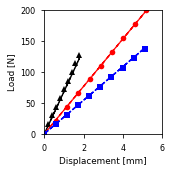

In [10]:
# Plot diametral compression curves for a few rims

ms = ['k^', 'ro', 'bs']
ls = ['k--', 'r--', 'b--']

with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))

    for i, r in enumerate(['Alex-ALX295', 'Y2000-26', 'CR18-700']):

        fname = '../data/rim_diam_compression/{0:s}.txt'.format(r)

        if os.path.isfile(fname):

            # Read load-displacement data
            load = np.array([])
            disp = np.array([])
            with open(fname) as f:
                f.readline()
                f.readline()
                for l in f:
                    load = np.append(load, -float(l.split()[0]) * 4.44822)
                    disp = np.append(disp, -float(l.split()[1]) * 0.0254)

            load = load - np.min(load)
            disp = disp - np.min(disp)
            
            p1 = np.polyfit(disp, load, 1)
            
            stiff = 4*rims['EI_11 static'][r][0]/rims['radius'][r]**3 / (np.pi - 8/np.pi)

            d = np.linspace(min(disp), max(disp), 10)
            ax.plot(1000*d, np.polyval(p1, d), ms[i])
            ax.plot(1000*disp, disp * stiff, ls[i])

    ax.set_xlim([0., 6.])
    ax.set_ylim([0., 200.])

    ax.set_xlabel('Displacement [mm]')
    ax.set_ylabel('Load [N]')

    plt.tight_layout()
    plt.savefig('../figs/acoustic_testing/_python_rad_disp.pdf')

f_rad:  {2: 92.0, 3: 259.7, 4: 496.1}
f_lat:  {2: 82.5, 3: 273.5, 4: 566.0, 5: 938.0}


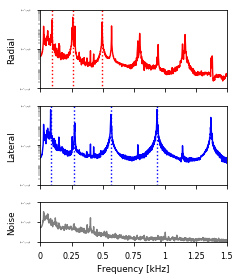

In [11]:
def fft_avg(x, fs, N_avg=32/4, N_buff=8192*4):
    'Calculate averaged fft with from multiple spectral averages.'
    X = 0.
    for i in range(N_avg):
        X = X + np.abs(np.fft.rfft(x[range(i*N_buff, (i+1)*N_buff)]))

    f = np.fft.rfftfreq(N_buff, 1./fs)
    return f, X / N_avg

n = 'CR18-700'  # Example rim

print 'f_rad: ', rims['f_rad'][n]
print 'f_lat: ', rims['f_lat'][n]

# load audio file
p_rad, fs_rad = sf.read('../data/acoustic_test/{0:s}_radial_{1:d}.wav'
                        .format(n, 1))
p_lat, fs_lat = sf.read('../data/acoustic_test/{0:s}_lateral_{1:d}.wav'
                        .format(n, 1))

p_nse, fs_nse = sf.read('../data/acoustic_test/{0:s}_noise.wav'.format(n))

# Get FFT spectrum
f_rad, fft_rad = fft_avg(p_rad, fs_rad)
f_lat, fft_lat = fft_avg(p_lat, fs_lat)
f_nse, fft_nse = fft_avg(p_nse, fs_nse)

with plt.style.context(('seaborn-paper')):

    fig, ax = plt.subplots(3, 1, gridspec_kw={'height_ratios': [2, 2, 1]}, figsize=(3.44, 4.0))  #w=3.88

    ax[0].plot(f_rad / 1000, fft_rad, 'r')
    for nn in range(2, 5):
        ax[0].plot([rims['f_rad'][n][nn]/1000, rims['f_rad'][n][nn]/1000], [0.01, 10**7], 'r:')

    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Radial')

    ax[1].plot(f_lat / 1000, fft_lat, 'b')
    for nn in range(2, 6):
        ax[1].plot([rims['f_lat'][n][nn]/1000, rims['f_lat'][n][nn]/1000], [0.01, 10**7], 'b:')

    ax[1].set_xticklabels([])
    ax[1].set_ylabel('Lateral')

    ax[2].plot(f_nse / 1000, fft_nse, 'gray')
    ax[2].set_ylabel('Noise')

    for a in ax:
        a.set_yscale('log')
        a.set_xlim([0, 1.5])
        a.set_ylim([1e-1, 1e3])
        a.set_yticks([1e-1, 1e1, 1e3])
        a.set_yticklabels(['\$10^{-1}\$', '\$10^{1}\$', '\$10^{3}\$'], fontsize='2')
        
        
    
    ax[2].set_xlabel('Frequency [kHz]')
    
    ax[2].set_xticklabels(['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5'])

    plt.tight_layout()

    plt.savefig('../figs/acoustic_testing/_python_fft.pdf')
    plt.show()

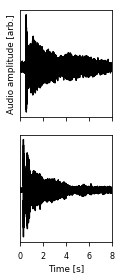

In [12]:
N = 32*8192

with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(nrows=2, figsize=(1.8, 4.0))
    
    t = np.linspace(0., len(p_rad)/fs_rad, len(p_rad))
    ax[0].plot(t, p_rad, 'k')
    ax[0].set_ylabel('Audio amplitude [arb.]')

    t = np.linspace(0., len(p_lat)/fs_lat, len(p_lat))
    ax[1].plot(t, p_lat, 'k')
#     ax[1].set_ylabel('Lateral [arb.]')
    
    for a in ax:
        a.set_xlim([0., 8])
        a.set_xticks([0, 2, 4, 6, 8])
        a.set_yticks([])
        
    ax[0].set_xticklabels([])
    ax[1].set_xlabel('Time [s]')
    
    plt.tight_layout()
    plt.savefig('../figs/acoustic_testing/_python_ringdown_both.pdf')

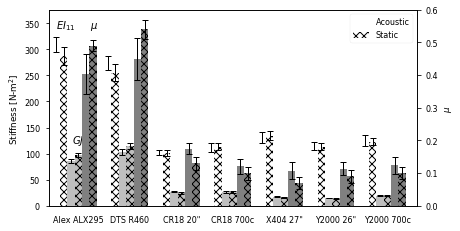

In [13]:
# rims.at['Y2000-26', 'mu_ac'] = (0.1, 0.0)

with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(figsize=(6.5, 3.32))
    
    i = np.arange(len(rims))
    n_bars = 6
    width = 1./(n_bars + 1)
    
    b1 = ax.bar(i - width, [rims['EI_11 acoust'][r][0] for r in rims.index],
                yerr=[rims['EI_11 acoust'][r][1] for r in rims.index],
                width=width, color='w', ecolor='k',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    b2 = ax.bar(i, [rims['EI_11 static'][r][0] for r in rims.index],
                yerr=[rims['EI_11 static'][r][1] for r in rims.index],
                width=width, color='w', ecolor='k', hatch='xxx',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    
    b3 = ax.bar(i + width, [rims['GJ_ac'][r][0] for r in rims.index],
                yerr=[rims['GJ_ac'][r][1] for r in rims.index],
                width=width, color='0.75', ecolor='k',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    b4 = ax.bar(i + 2*width, [rims['GJ_4p'][r][0] for r in rims.index],
                yerr=[rims['GJ_4p'][r][1] for r in rims.index],
                width=width, color='0.75', ecolor='k', hatch='xxx',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    
    ax2 = ax.twinx()
    b5 = ax2.bar(i + 3*width, [rims['mu_ac'][r][0] for r in rims.index],
                yerr=[rims['mu_ac'][r][1] for r in rims.index],
                width=width, color='0.5', ecolor='k',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    b6 = ax2.bar(i + 4*width, [rims['mu_4p'][r][0] for r in rims.index],
                yerr=[rims['mu_4p'][r][1] for r in rims.index],
                width=width, color='0.5', ecolor='k', hatch='xxx',
                error_kw=dict(lw=1, capsize=3, capthick=1))
    
    ax.text(0.0 - width, 340, '$EI_{11}$')
    ax.text(0.3 - width, 120, '$GJ$')
    ax.text(0.65 - width, 340, '$\mu$')
    
    ax.legend((b1, b2), ('Acoustic', 'Static'))
    
    ax.set_xticks(i + 2*width)
    ax.set_xticklabels(rims['label'])
    
    ax.set_ylim([0., 375])
    ax.set_xlim([-2*width, 7 - width])
    
    ax.xaxis.set_ticks_position('none')
    ax2.xaxis.set_ticks_position('none')
    
    ax.set_ylabel('Stiffness [N-m$^2$]')
    ax2.set_ylabel('$\mu$')
    
    plt.tight_layout()
    plt.savefig('../figs/acoustic_testing/_python_bar_plot.pdf')
    
    plt.show()

# Percent errors on $GJ$ and $EI_{11}$

In [14]:
print 'RIM             EI   GJ   mu'
for r in rims.index:

    err_EI = 100.0*np.abs(rims['EI_11 acoust'][r][0] - rims['EI_11 static'][r][0]) / rims['EI_11 static'][r][0]
    err_GJ = 100.0*np.abs(rims['GJ_ac'][r][0] - rims['GJ_4p'][r][0]) / rims['GJ_4p'][r][0]
    err_mu = 100.0*np.abs(rims['mu_ac'][r][0] - rims['mu_4p'][r][0]) / rims['mu_4p'][r][0]
    
#     print rims['mu_ac'][r][0], rims['mu_4p'][r][0]
    
    print '{0:12s}: {1:4.1f} {2:4.1f} {3:4.1f}'.format(r, err_EI, err_GJ, err_mu)

RIM             EI   GJ   mu
Alex-ALX295 :  7.6 11.2 17.4
DTS-R460    :  7.1  9.7 16.9
CR18-20     :  1.1  6.7 34.6
CR18-700    :  1.3  1.6 20.3
X404-27     :  2.1  6.1 53.6
Y2000-26    :  0.5  8.9 26.4
Y2000-700   :  1.8  1.7 23.4


# Hypothetical wheels

## Racing bike wheel

In [15]:
wh = BicycleWheel()
wh.hub = wh.Hub(diam1=0.05, width1=0.060/2)

r = 'Alex-ALX295'
R = rims['radius'][r]
GJ = rims['GJ_ac'][r][0]
EI1 = rims['EI_11 acoust'][r][0]
EI2 = GJ / rims['mu_ac'][r][0]



wh.rim = wh.Rim(radius=R,
              area=100e-6,
              I11=GJ / 26.0e9,
              I22=EI2 / 69.0e9,  # 266.0
              I33=EI1 / 69.0e9,
              Iw=0.0 / 69.0e9,
              young_mod=69.0e9,
              shear_mod=26.0e9)

wh.lace_radial(n_spokes=24, diameter=1.7e-3, young_mod=200e9, offset=0.0)

# Calculate effective spoke diameter, accounting for swaged gauge
l_tot = wh.spokes[0].length
l_thin = 0.204
d_thin = 0.00172
d_thick = 0.00198
d_eff = np.sqrt(l_tot / (l_thin/d_thin**2 + (l_tot - l_thin)/d_thick**2))

wh.lace_radial(n_spokes=24, diameter=2.0e-3, young_mod=200e9, offset=0.0)

print GJ, EI2
print 24./2 * (wh.spokes[0].EA/wh.spokes[0].length)*np.sin(wh.spokes[0].alpha)**2 / 1000
print bl.lateral_stiffness(wh) / 1000
print (1./bl.mode_stiff(wh, n=0)[0] + 1./bl.mode_stiff(wh, n=1)[0]) * bl.lateral_stiffness(wh)

print bl.calc_rad_stiff(wh) / 1000

85.719330639 211.729314712
303.874210054
120.662231696
0.59561931074
4750.8340159


## Vintage road wheel

In [16]:
wh = BicycleWheel()
wh.hub = wh.Hub(diam1=0.05, width1=0.060/2)

r = 'X404-27'
R = rims['radius'][r]
GJ = rims['GJ_ac'][r][0]
EI1 = rims['EI_11 acoust'][r][0]
EI2 = GJ / rims['mu_ac'][r][0]

wh.rim = wh.Rim(radius=0.304,
              area=100e-6,
              I11=GJ / 26.0e9,
              I22=EI2 / 69.0e9,  # 266.0
              I33=EI1 / 69.0e9,
              Iw=0.0 / 69.0e9,
              young_mod=69.0e9,
              shear_mod=26.0e9)

wh.lace_radial(n_spokes=36, diameter=2.0e-3, young_mod=200e9, offset=0.0)

print GJ, EI2
print 36./2 * (wh.spokes[0].EA/wh.spokes[0].length)*np.sin(wh.spokes[0].alpha)**2 / 1000
print bl.lateral_stiffness(wh) / 1000
print (1./bl.mode_stiff(wh, n=0)[0] + 1./bl.mode_stiff(wh, n=1)[0]) * bl.lateral_stiffness(wh)
print bl.calc_rad_stiff(wh) / 1000

16.8670999736 156.89913776
460.673779542
146.829759297
0.47809241317
5149.09841483
